# Examining galaxies in the MKW 11 poor cluster

In [73]:
from mpl_toolkits import mplot3d
%matplotlib inline
from pylab import *
from numpy import *
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.graph_objs as go

In [74]:
# import and read the SDSS data of the MKW 11 cluster
mkw11_sdss = pd.read_csv("mkw11_sdss.csv")
mkw11_sdss

ra        dec         z  petroMag_g  petroMag_i  modelMag_g  \
0     198.003323   8.446913  0.046162   17.732391   16.614103   17.717041   
1     198.016396   9.330706  0.037916   17.492077   17.017693   17.457811   
2     198.017343   8.667204  0.050599   16.449110   15.590202   16.540787   
3     198.024184   9.956075  0.054641   17.662783   16.511738   17.639544   
4     198.038003   7.012837  0.019753   17.944862   17.371056   18.095045   
...          ...        ...       ...         ...         ...         ...   
1390  206.948776  11.274151  0.039419   15.748307   14.765886   15.619482   
1391  206.966650  15.290122  0.059901   18.512051   17.370596   18.446777   
1392  206.974026  13.393667  0.047291   17.341705   16.783800   17.478378   
1393  206.982671  14.642751  0.060222   17.823515   16.988808   17.656713   
1394  206.997025  15.893290  0.059507   18.012957   17.601267   18.036915   

      modelMag_i               objID  
0      16.554628  588017730841477269  
1      16.980700  587736542010802379  
2      15.610589  587736540937060556  
3      16.462553  587736542547673293  
4      17.636734  588017724943040544  
...          ...                 ...  
1390   14.620803  587736477586554950  
1391   17.266932  587742592547160168  
1392   16.803631  587738568712847567  
1393   16.845383  587738570323460100  
1394   17.502491  587742627981426852  

[1395 rows x 8 columns]

## Parameter definitions:
- ra = right ascension
- dec = declination
- z = redshift
- petroMag = magnitude
- modelMag = the best-fit model in the r-band is fit to the other four bands; they are therefore used instead of Petrosian magnitudes for target selection in BOSS
- objID = identification number

## NASA Extragalatic Database (NED) info for MKW 11:
- R.A (J2000): 13h29m31.2s
- Dec (J2000): +11d47m19s
- Recessional velocity in heliocentric rest frame: 6849.958833 +/- 60.857878 km/s
- Recessional velocity in CMB rest frame: 7138 +/- 64 km/s
- Distance to the cluster (quoted in NED): 105.28 +/- 7.43 Mpc
- Galactic Latitude: 72.246052 deg
- Galactic extinction in g-band: 0.113
- Galactic extinction in i-band: 0.058

In [75]:
# Known values
z = mkw11_sdss["z"]
petroMag_i = mkw11_sdss["petroMag_i"]
modelMag_i = mkw11_sdss["modelMag_i"]
modelMag_g = mkw11_sdss["modelMag_g"]

In [76]:
# Preparing the data for use
H_o = 73. #Hubble constant [km/s/Mpc]
v_helio = z * 299796.
v_cmb = v_helio + (7138. - 6850.)
D = v_cmb/H_o # D = distance (to match the CMB in Gavazzi, Fumagalli et al.)
#m - M = 5*np.log(D -5+ A) #where A is the extinction in mags.
#Extinction at g and i are: 0.113 and 0.058 respectively;
#According to SDSS, use petroMag for luminosity but modelmag for colors (a minor detail)
corrpetroMag_i=petroMag_i - 0.058
corrmodelMag_i=modelMag_i - 0.058
corrmodelMag_g=modelMag_g - 0.113
#M = m + 5 - 5 log D *10^6     #(remember D in pc here!)
#AbsImag = corrmag + 5 - 30 - 5* log10(D) so,
AbsImag = corrpetroMag_i - 25. - 5*log10(D)
gminusi = corrmodelMag_g - corrmodelMag_i

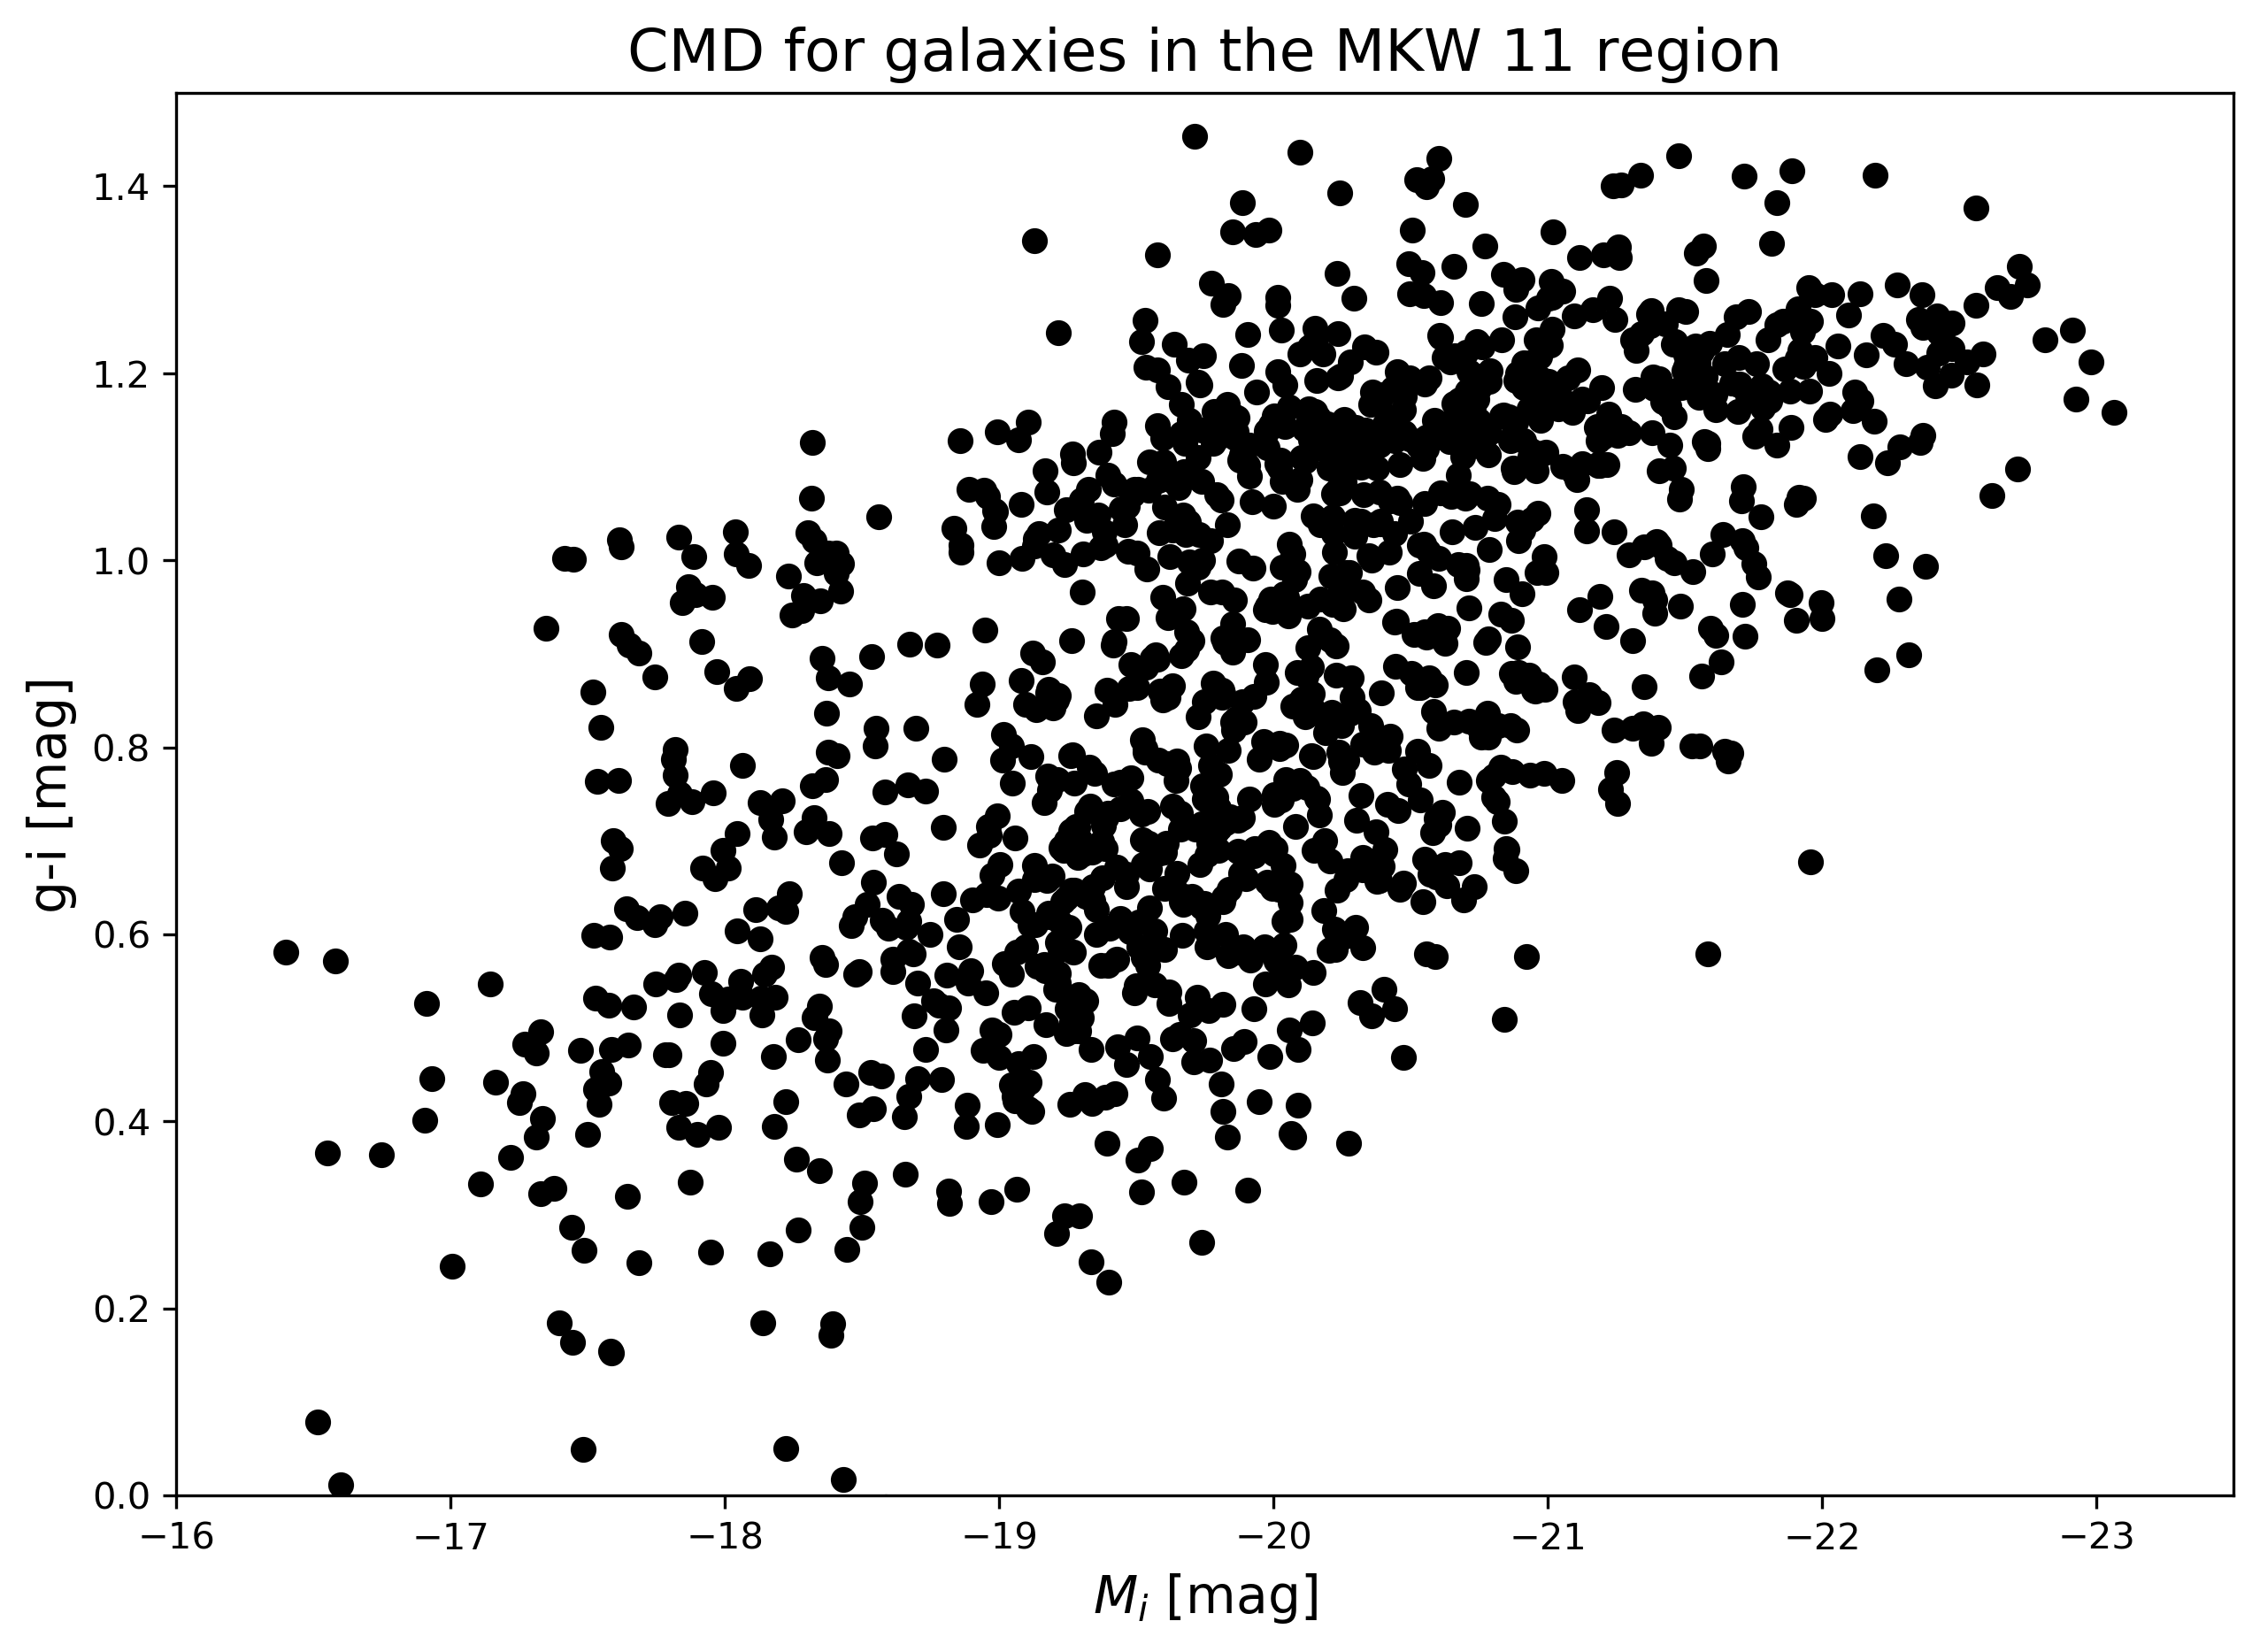

In [77]:
# Creating a CMD for the MKW 11 region
fig = figure(figsize=(10,7), dpi=300)
scatter(AbsImag,gminusi, color="k")
plt.gca().invert_xaxis()
xlim(-16,-23.5)
ylim(0.0,1.5)
xlabel("$M_i$ [mag]", fontsize=14)
ylabel("g-i [mag]", fontsize=14)
title("CMD for galaxies in the MKW 11 region", fontsize=16)
savefig("mkw11CMD")
show()

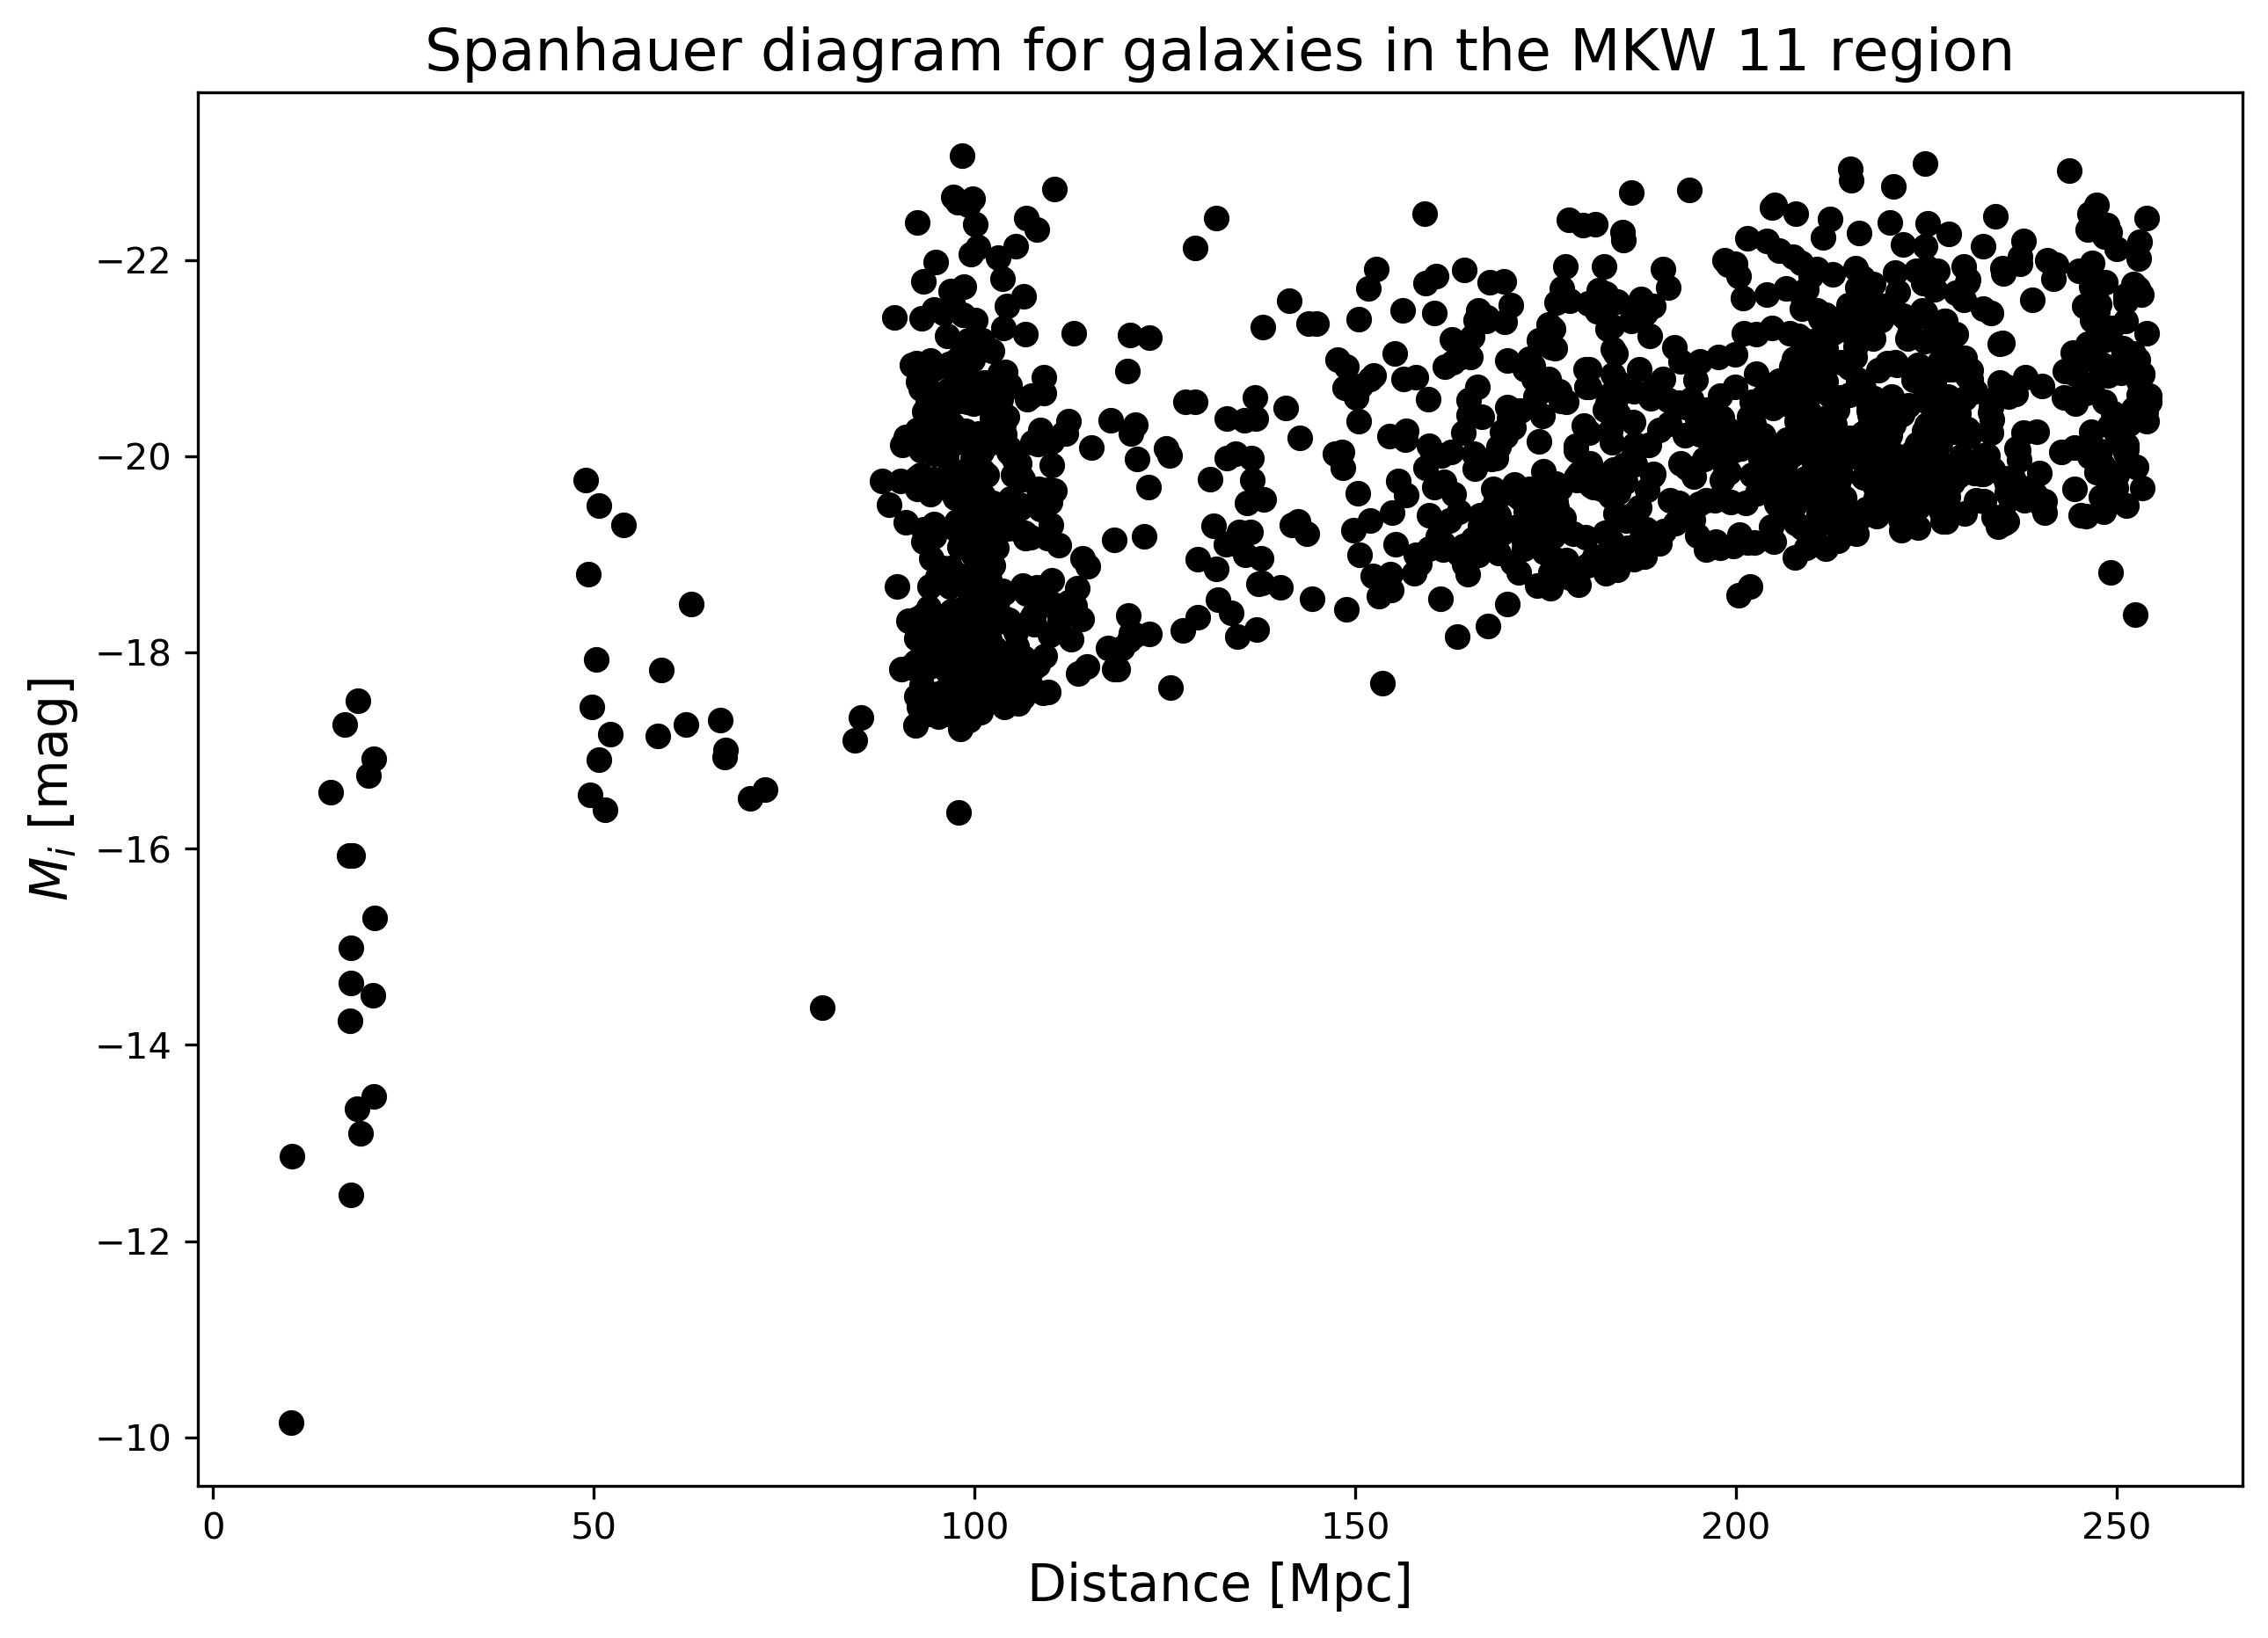

In [78]:
# Spanhauer Diagram
fig = figure(figsize=(10,7), dpi=300)
scatter(D,AbsImag, color="k")
plt.gca().invert_yaxis()
xlabel("Distance [Mpc]", fontsize=14)
ylabel("$M_i$ [mag]", fontsize=14)
title("Spanhauer diagram for galaxies in the MKW 11 region", fontsize=16)
savefig("mkw11Spanhauer")
show()

In [79]:
# Gas and stars in the MKW 11 cluster

# importing and reading the data including properties of the galaxies
red = pd.read_csv("redpoints.csv")
blue = pd.read_csv("bluepoints.csv")
green = pd.read_csv("greenpoints.csv")

In [80]:
red # galaxies within 6º of the cluster at any velocity

agcnum     radeg  decdeg  distMpc     Vcmb  logL_V  logMH  gas2L_V  \
0    232458  196.4404  12.052    161.0  11267.0   10.38   9.81  -0.5669   
1    232459  196.5271  12.526    238.3  16680.0   10.17  10.13  -0.0376   
2      8192  196.5767  10.377    142.8   9994.0   10.66  10.18  -0.4795   
3    230077  196.5971  10.433     16.6   1237.0    7.08   8.64   1.5624   
4    232325  196.6479  11.552    237.3  16609.0   10.33  10.17  -0.1575   
..      ...       ...     ...      ...      ...     ...    ...      ...   
490    8772  208.0350  14.116    101.1   7077.0   10.67   9.57  -1.0970   
491  232436  208.0629  11.502    172.7  12089.0    9.84   9.80  -0.0380   
492  230768  208.0817  13.576    161.3  11292.0   10.65  10.30  -0.3472   
493  232558  208.2617  12.553     97.1   6794.0    9.47   9.60   0.1343   
494  230792  208.3767  11.343    165.1  11560.0   10.46  10.07  -0.3902   

     AbsMag_i   logL_i  gas2L_i  sepmin  
0      -21.42  10.4010  -0.5910  349.04  
1      -20.77  10.1394  -0.0094  346.13  
2      -22.30  10.7503  -0.5703  352.04  
3      -11.77   6.5406   2.0994  350.04  
4      -21.44  10.4077  -0.2377  337.11  
..        ...      ...      ...     ...  
490    -22.40  10.7917  -1.2217  358.91  
491    -19.78   9.7439   0.0561  334.39  
492    -22.16  10.6971  -0.3971  350.54  
493    -18.61   9.2745   0.3255  348.00  
494    -21.61  10.4757  -0.4057  353.50  

[495 rows x 12 columns]

In [81]:
blue # galaxies within 6º of the cluster with accounted redshifts

agcnum     radeg  decdeg  distMpc    Vcmb  logL_V  logMH  gas2L_V  \
0    232245  196.7996  11.168    110.8  7753.0    9.92   9.89  -0.0318   
1    232246  196.8708  11.713    112.0  7843.0    9.58   9.35  -0.2302   
2    232247  196.8796  12.358    100.5  7035.0    9.06   9.13   0.0708   
3    233779  197.0129  11.300    112.4  7867.0    9.68   9.69   0.0119   
4    233610  197.0712  11.806    111.7  7818.0    8.49   9.34   0.8540   
..      ...       ...     ...      ...     ...     ...    ...      ...   
187  233564  207.8537  10.177    108.2  7574.0    9.49   9.66   0.1709   
188    8766  207.8788  14.092    103.7  7257.0   11.02   9.94  -1.0828   
189  233561  207.9113  14.343    105.3  7370.0    9.31   9.52   0.2113   
190    8772  208.0350  14.116    101.1  7077.0   10.67   9.57  -1.0970   
191  232558  208.2617  12.553     97.1  6794.0    9.47   9.60   0.1343   

     AbsMag_i   logL_i  gas2L_i  sepmin  
0      -19.95   9.8106   0.0794  330.23  
1      -19.40   9.5916  -0.2416  323.65  
2      -18.14   9.0874   0.0426  324.52  
3      -19.39   9.5861   0.1039  316.86  
4      -16.41   8.3966   0.9434  311.79  
..        ...      ...      ...     ...  
187    -19.06   9.4545   0.2055  336.58  
188    -23.16  11.0971  -1.1571  349.95  
189    -18.72   9.3209   0.1991  357.74  
190    -22.40  10.7917  -1.2217  358.91  
191    -18.61   9.2745   0.3255  348.00  

[192 rows x 12 columns]

In [82]:
green # galaxies within the MKW 11 cluster itself (within 2 Mpc with accounted redshifts)

agcnum     radeg  decdeg  distMpc    Vcmb  logL_V  logMH  gas2L_V  \
0   232218  201.8550  11.884    105.1  7356.0   10.29   9.29  -1.0019   
1   232504  202.0842  12.762    110.0  7699.0    9.30   9.54   0.2437   
2   232507  202.1492  12.066    104.7  7326.0    9.85   9.41  -0.4408   
3   230351  202.1671  12.711    110.9  7765.0   10.45   9.63  -0.8237   
4   232392  202.2179  11.756    106.3  7438.0    9.35   9.60   0.2476   
5   230356  202.2675  12.238    107.8  7544.0   10.34   9.72  -0.6219   
6   232509  202.2917  12.769    105.9  7412.0    9.19   9.46   0.2651   
7     8475  202.3575  11.008    101.8  7123.0   10.35  10.66   0.3138   
8   230367  202.3979  11.697     97.6  6835.0    9.90   9.30  -0.6003   
9   232407  202.4608  11.350    100.4  7027.0    9.30   9.38   0.0802   
10    8486  202.4867  11.072    100.6  7039.0   10.15   9.64  -0.5135   
11  233873  202.5575  11.544     99.5  6967.0    9.20   9.24   0.0449   
12  233637  202.5887  12.484    106.9  7481.0    7.68   9.14   1.4573   
13  230380  202.6662  11.595    107.6  7529.0   10.21   9.48  -0.7316   
14  232292  202.7658  11.027    108.9  7621.0    9.43   9.15  -0.2824   
15  230389  202.8412  10.726     94.1  6590.0    9.91   9.74  -0.1745   
16  232412  202.9771  11.807    103.6  7249.0    9.15   9.08  -0.0736   
17  230417  203.3283  11.117    112.8  7896.0    9.95   9.75  -0.2006   

    AbsMag_i   logL_i  gas2L_i  sepmin  
0     -21.18  10.3041  -1.0141   31.35  
1     -18.42   9.1987   0.3413   60.94  
2     -20.29   9.9464  -0.5364   21.44  
3     -21.77  10.5382  -0.9082   56.72  
4     -18.75   9.3309   0.2691    9.72  
5     -21.41  10.3975  -0.6775   27.75  
6     -18.65   9.2914   0.1686   59.04  
7     -21.49  10.4285   0.2315   46.87  
8     -20.32   9.9608  -0.6608    5.58  
9     -18.60   9.2720   0.1080   26.74  
10    -20.76  10.1357  -0.4957   43.46  
11    -18.21   9.1141   0.1259   18.01  
12    -13.77   7.3402   1.7998   43.46  
13    -20.97  10.2202  -0.7402   20.45  
14    -18.93   9.4033  -0.2533   51.04  
15    -20.22   9.9190  -0.1790   69.30  
16    -18.34   9.1663  -0.0863   35.08  
17    -20.44  10.0063  -0.2563   68.80

In [83]:
# i-band luminosities
rlogL_i = red["logL_i"]
blogL_i = blue["logL_i"]
glogL_i = green["logL_i"]

# gas fraction in i-band parameter 
rgas_fraci = red["gas2L_i"]
bgas_fraci = blue["gas2L_i"]
ggas_fraci = green["gas2L_i"]

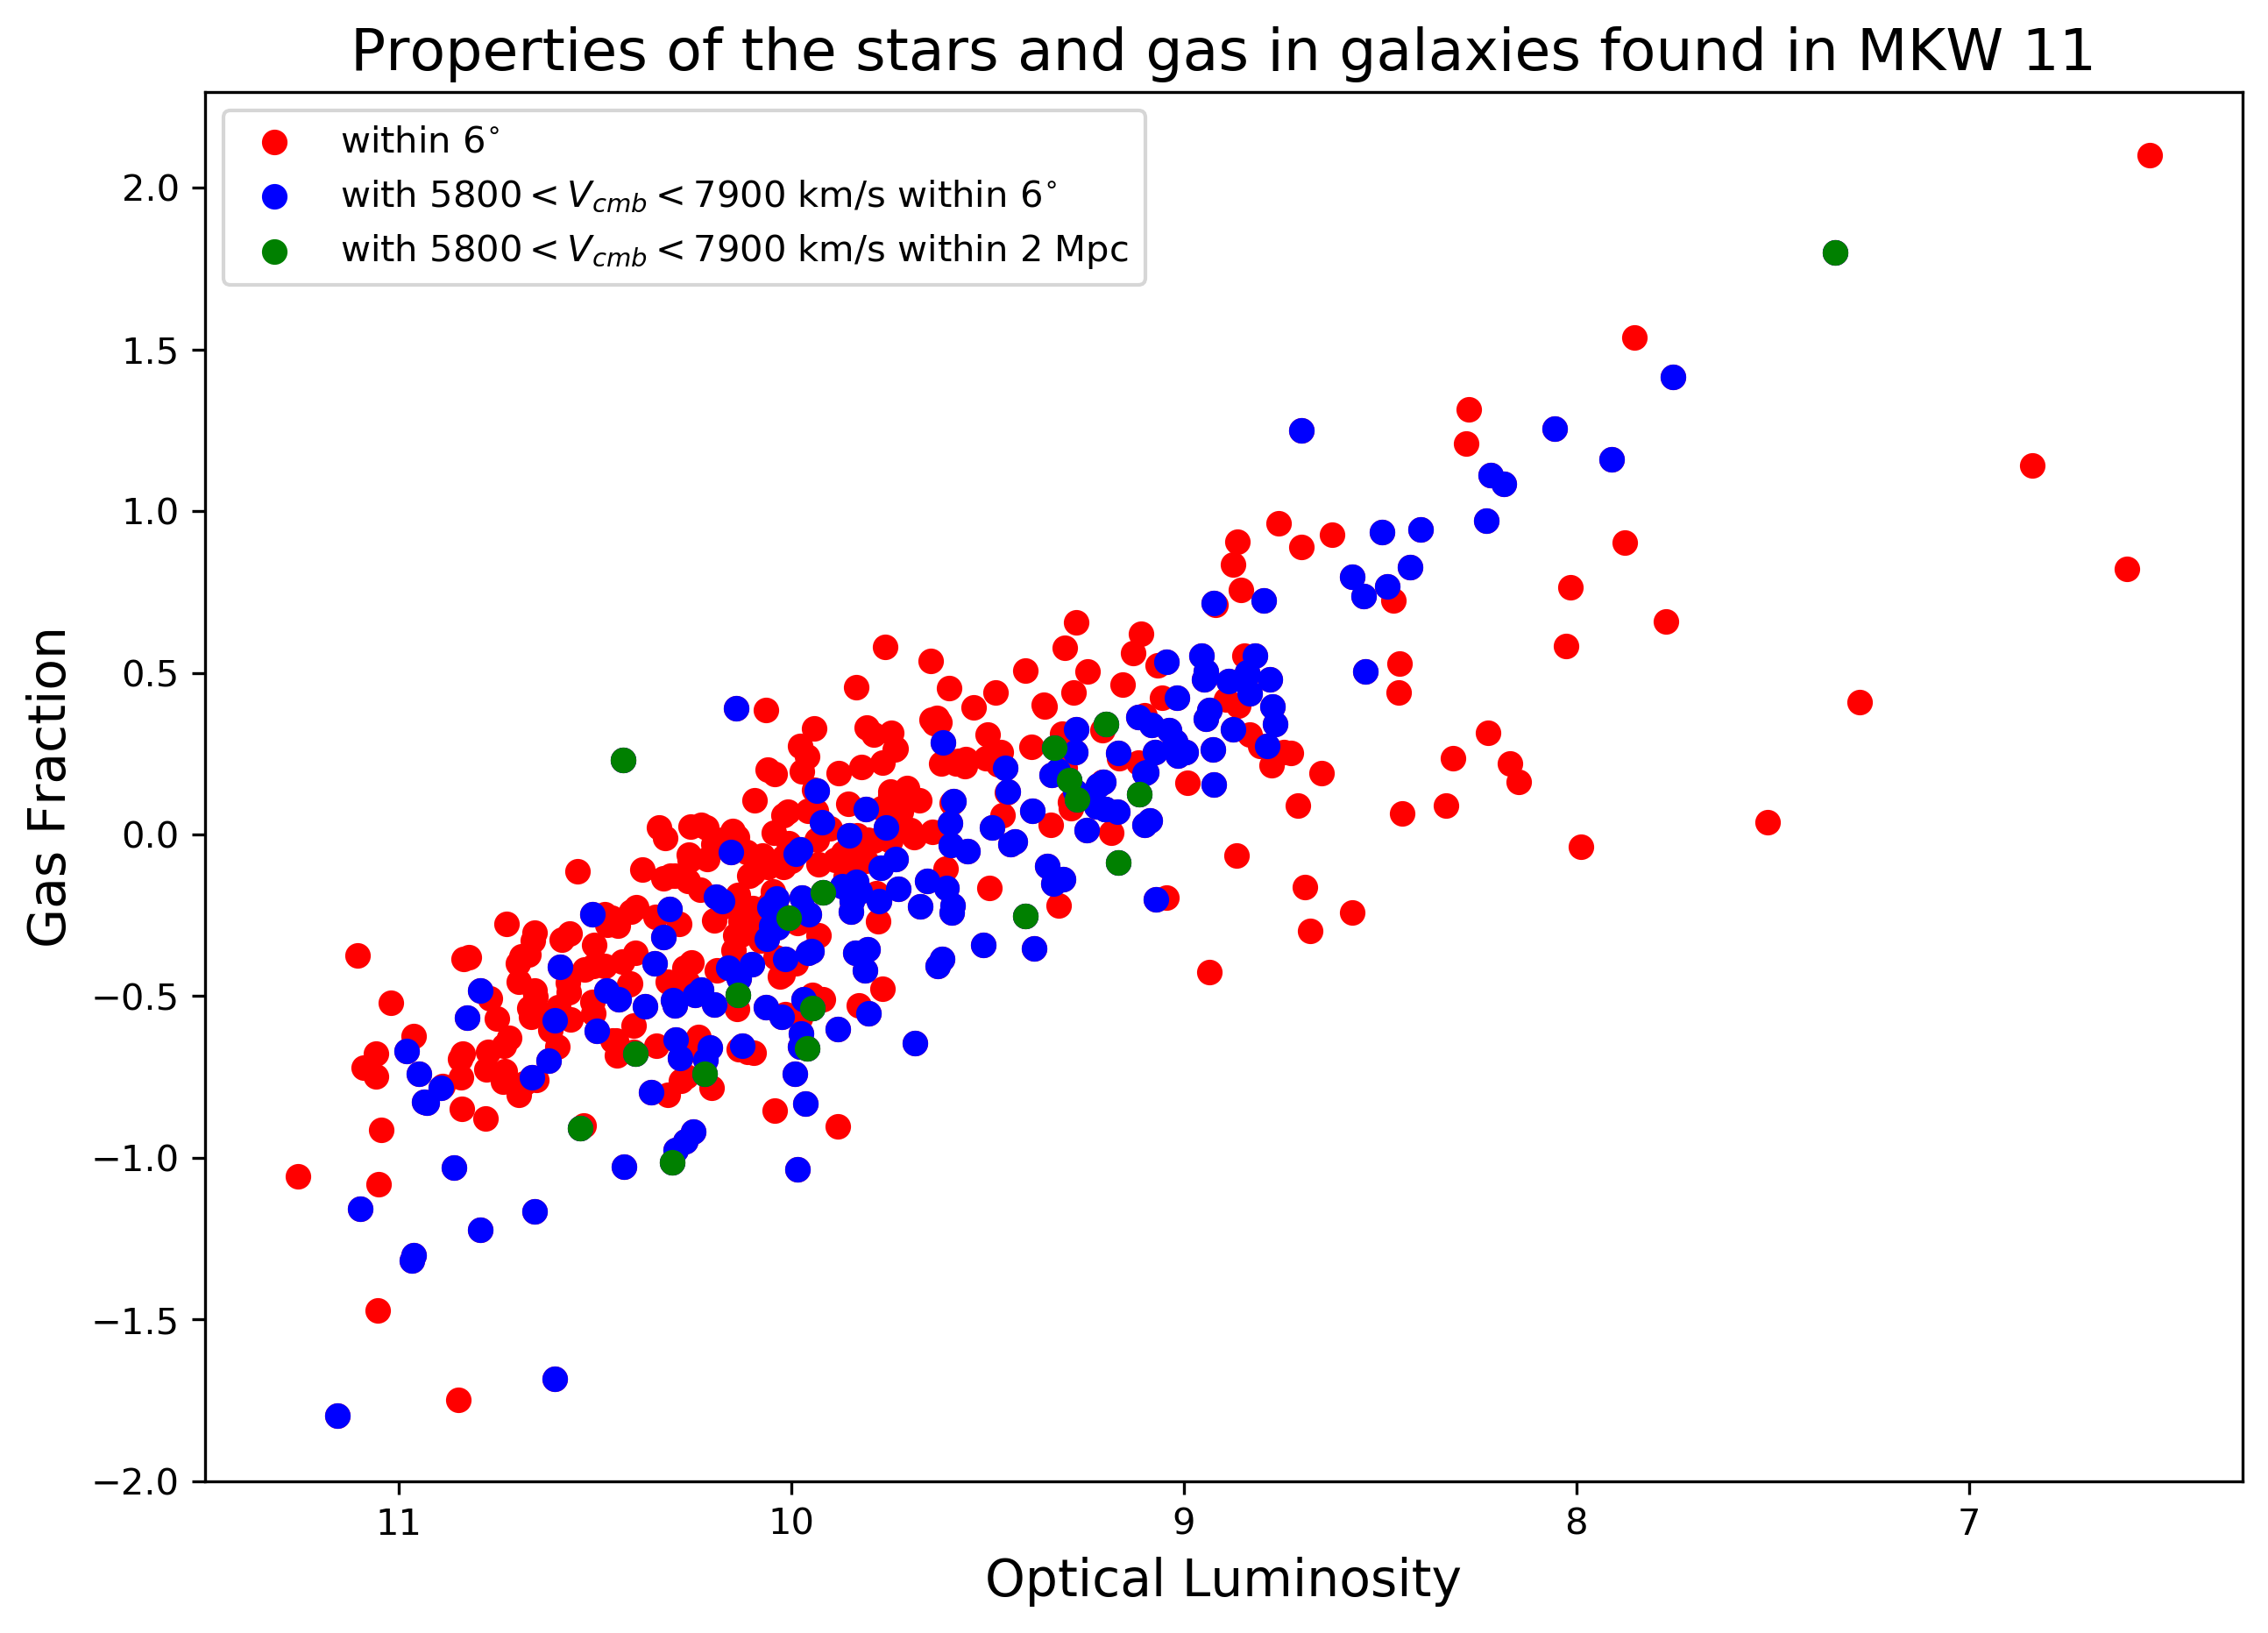

In [84]:
# plotting the gas fraction and HI mass parameters against the optical luminosity
fig = figure(figsize=(10,7), dpi=300)
scatter(rlogL_i, rgas_fraci, color="r", label="within $6^{\circ}$")
scatter(blogL_i, bgas_fraci, color="b", label="with $5800 < V_{cmb} < 7900$ km/s within $6^{\circ}$")
scatter(glogL_i, ggas_fraci, color="g", label="with $5800 < V_{cmb} < 7900$ km/s within 2 Mpc ")
plt.gca().invert_xaxis()
xlabel("Optical Luminosity", fontsize=14)
ylabel("Gas Fraction", fontsize=14)
title("Properties of the stars and gas in galaxies found in MKW 11", fontsize=16)
legend()
savefig("gasfraction")
show()

In [85]:
# Hydrogen 1 Mass data points
r_mass = red["logMH"]
b_mass = blue["logMH"]
g_mass = green["logMH"]

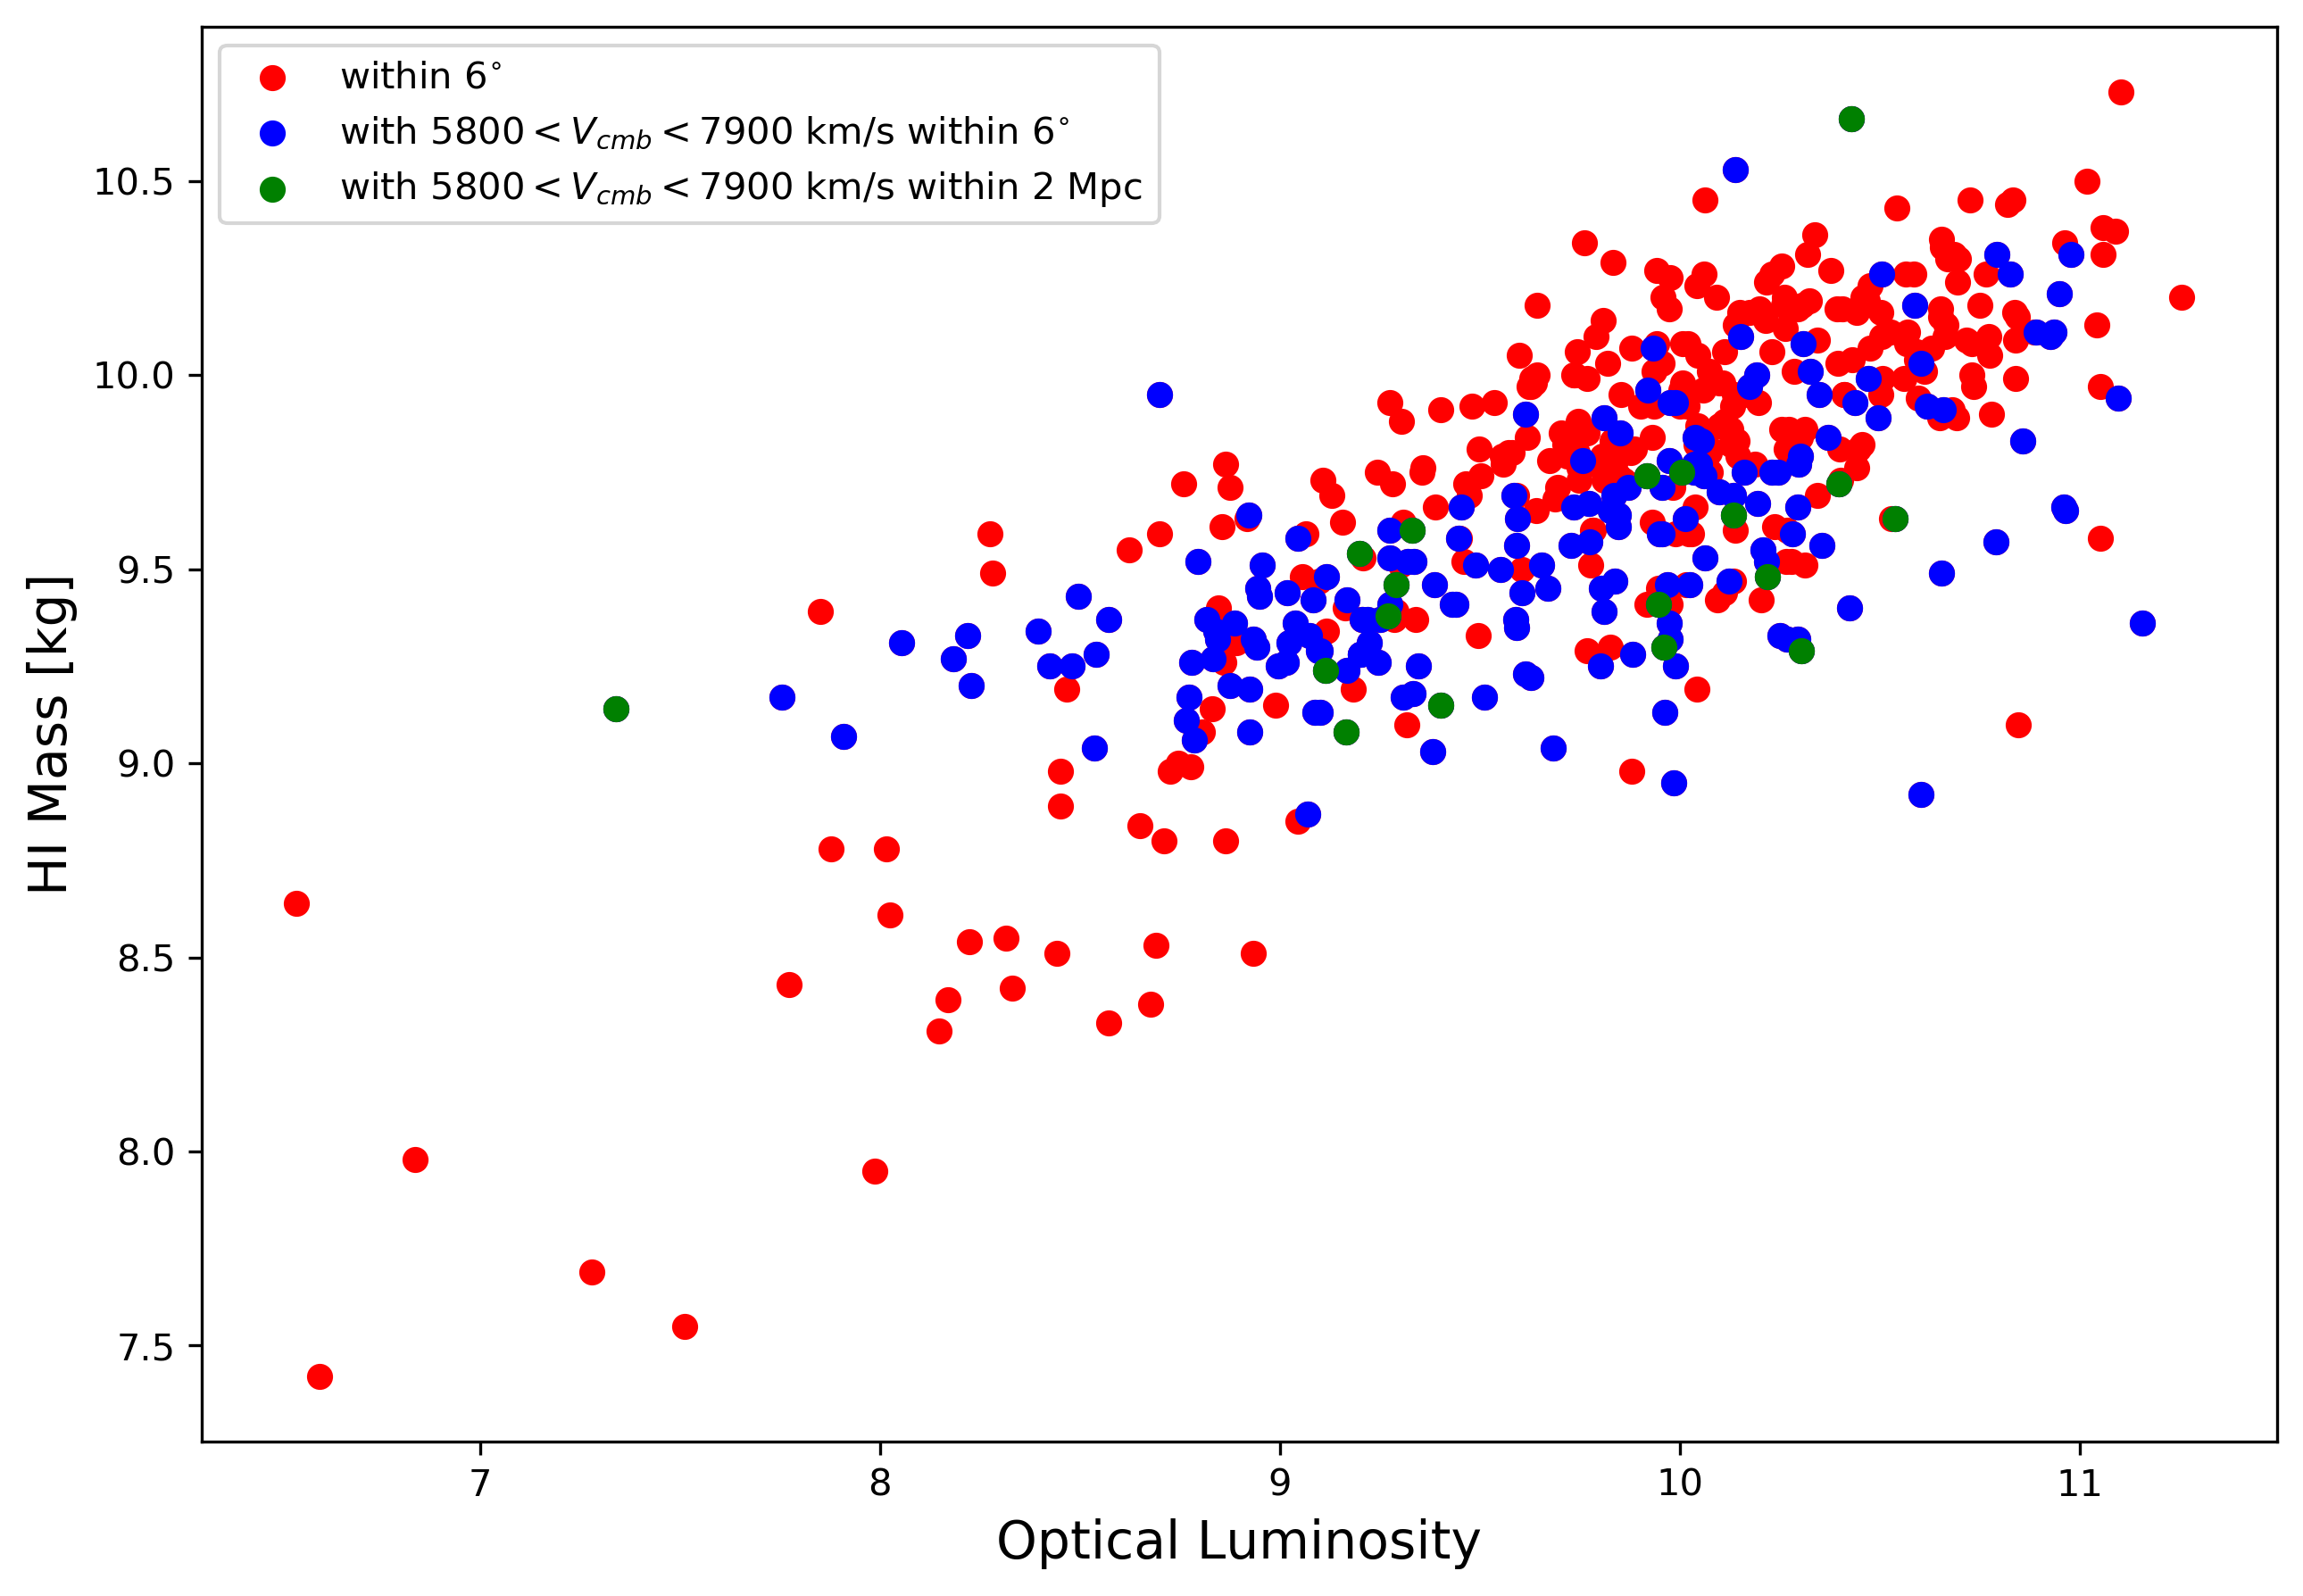

In [86]:
fig = figure(figsize=(10,7), dpi=300)
scatter(rlogL_i, r_mass, color="r", label="within $6^{\circ}$")
scatter(blogL_i, b_mass, color="b", label="with $5800 < V_{cmb} < 7900$ km/s within $6^{\circ}$")
scatter(glogL_i, g_mass, color="g", label="with $5800 < V_{cmb} < 7900$ km/s within 2 Mpc ")
xlabel("Optical Luminosity", fontsize=14)
ylabel("HI Mass [kg]", fontsize=14)
legend()
savefig("hmass")
show()

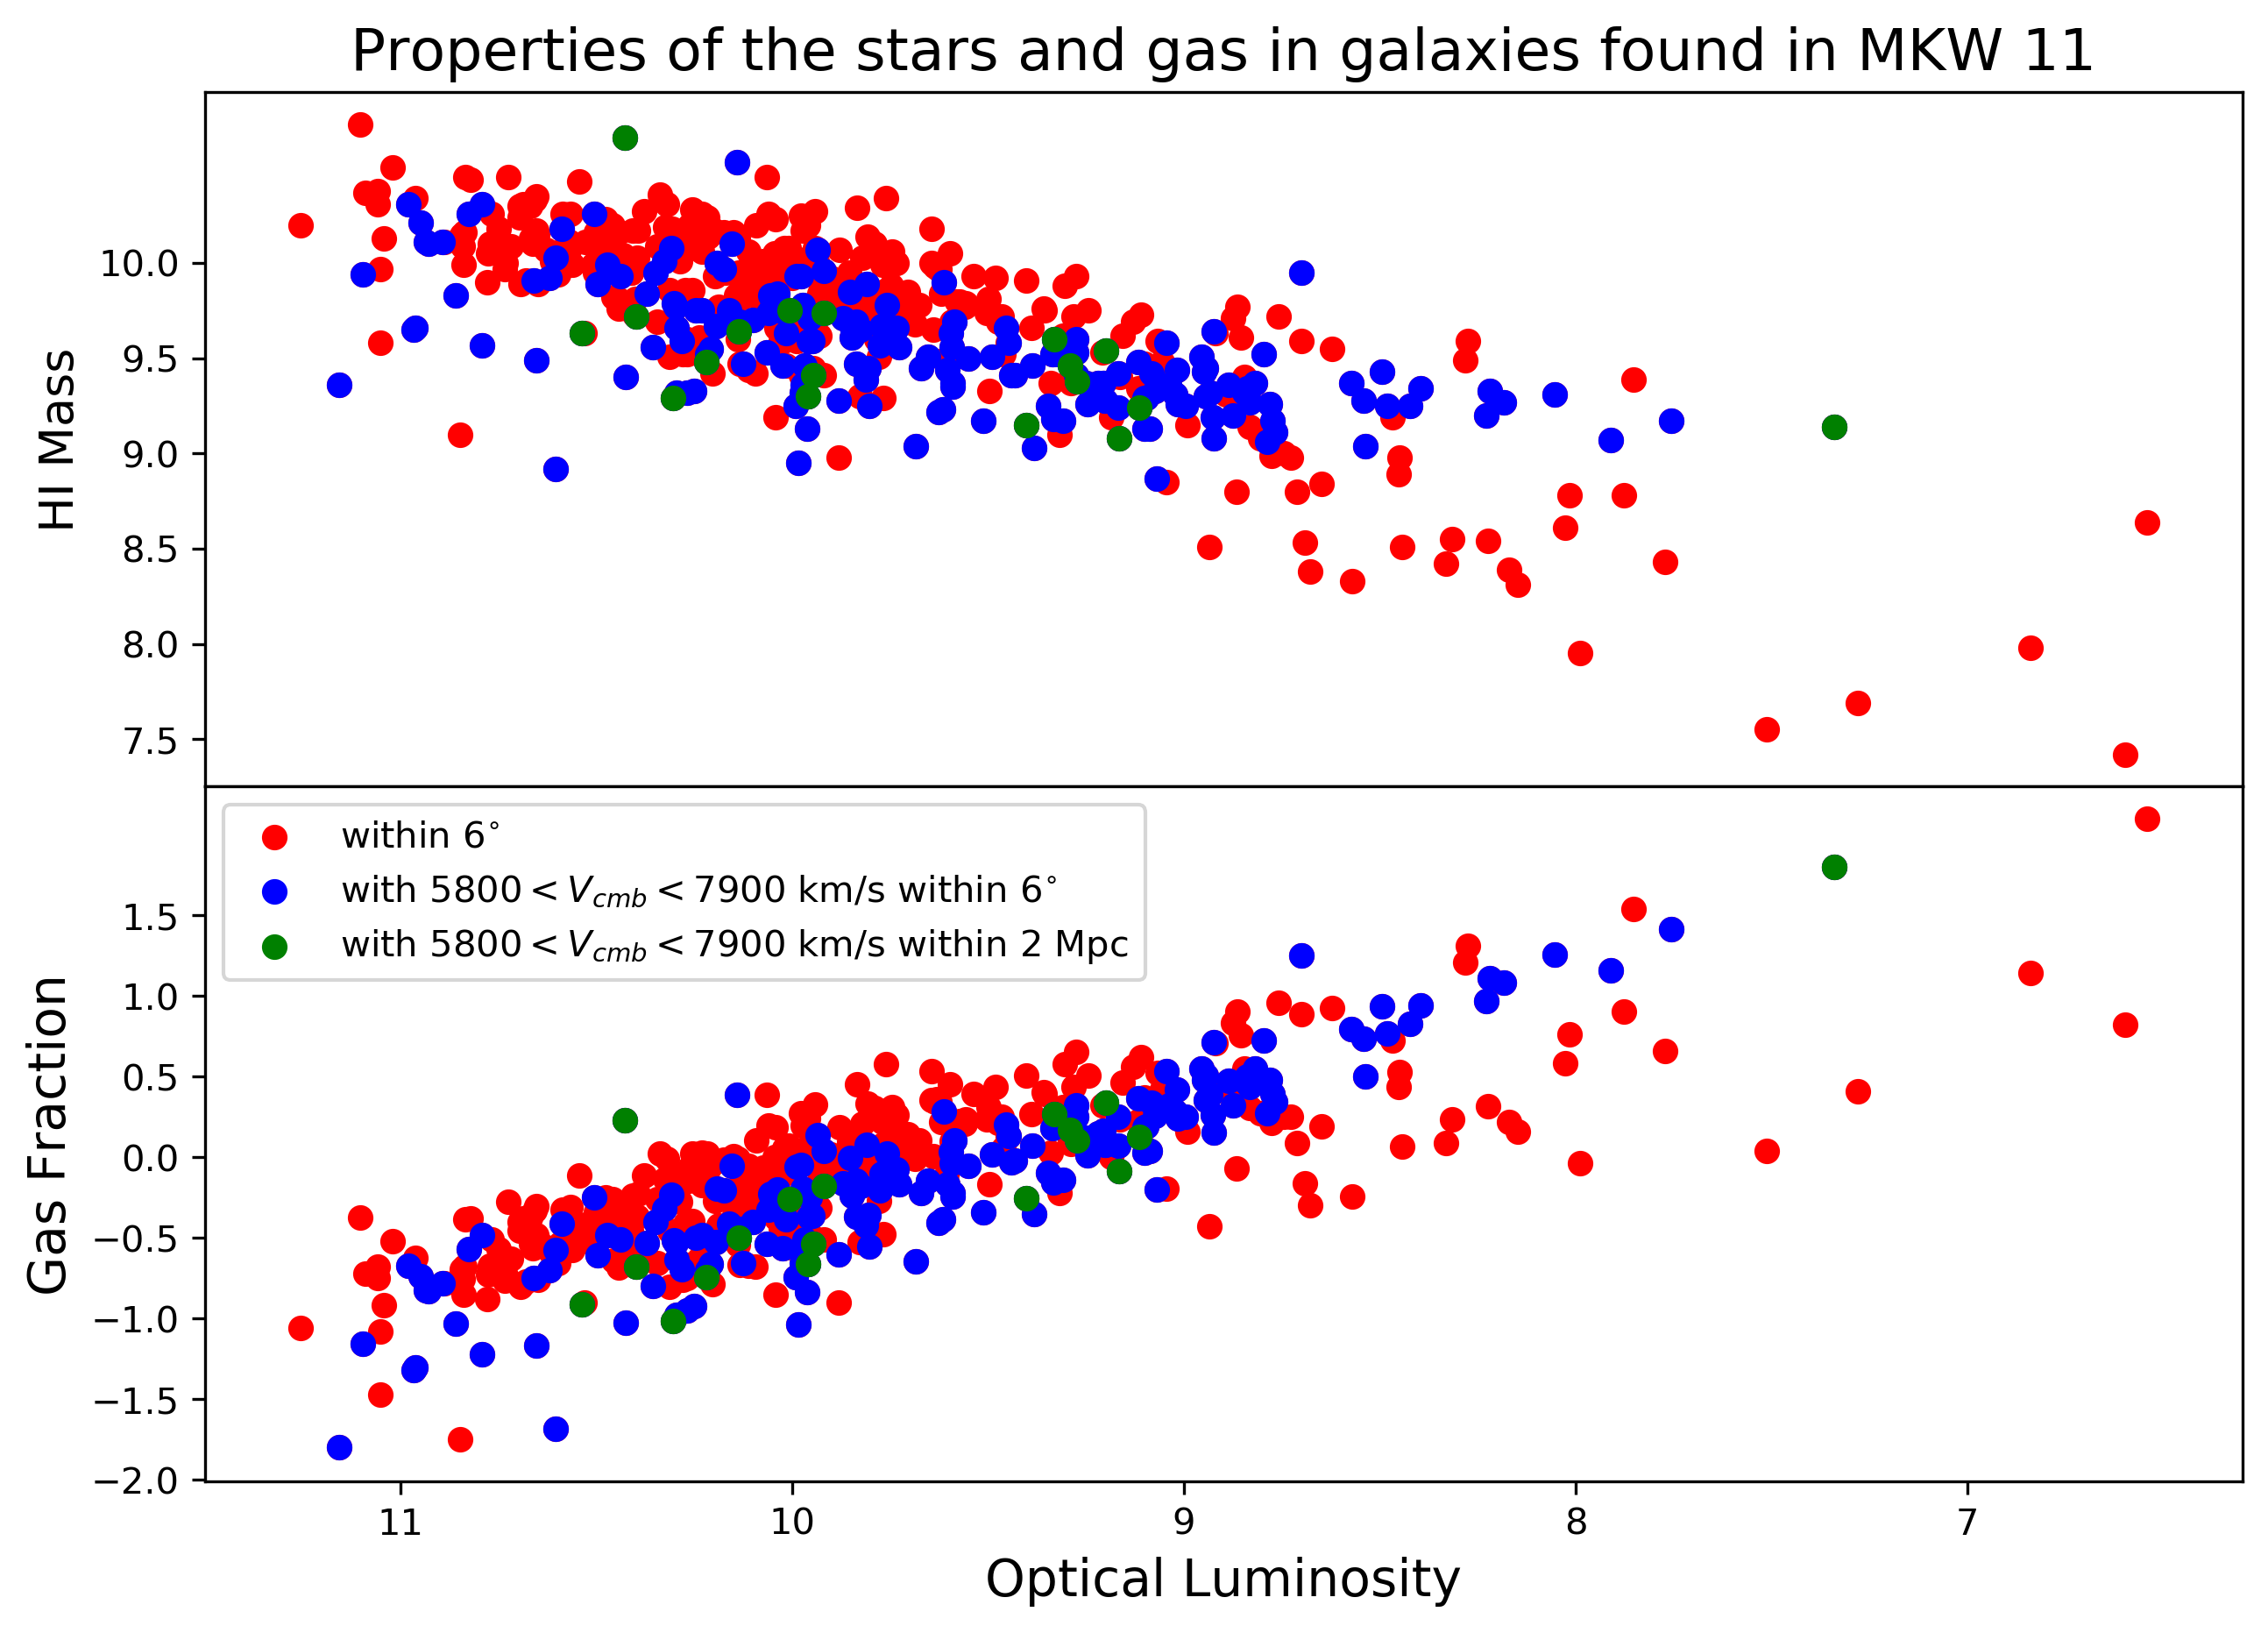

In [87]:
# Formatting the optical luminosity plots to share the x-axis

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(10,7), dpi=300)
# Remove horizontal space between axes
fig.subplots_adjust(hspace=0)

# Plot each graph, and manually set the y tick values
axs[0].scatter(rlogL_i, r_mass, color="r", label="within $6^{\circ}$")
axs[0].scatter(blogL_i, b_mass, color="b", label="with $5800 < V_{cmb} < 7900$ km/s within $6^{\circ}$")
axs[0].scatter(glogL_i, g_mass, color="g", label="with $5800 < V_{cmb} < 7900$ km/s within 2 Mpc ")
axs[0].set_yticks(np.arange(7.5, 10.5, 0.5))
axs[0].set_ylabel("HI Mass", fontsize=13)
axs[0].set_title("Properties of the stars and gas in galaxies found in MKW 11", fontsize=16)
#axs[0].set_ylim(-1, 1)

axs[1].scatter(rlogL_i, rgas_fraci, color="r", label="within $6^{\circ}$")
axs[1].scatter(blogL_i, bgas_fraci, color="b", label="with $5800 < V_{cmb} < 7900$ km/s within $6^{\circ}$")
axs[1].scatter(glogL_i, ggas_fraci, color="g", label="with $5800 < V_{cmb} < 7900$ km/s within 2 Mpc ")
axs[1].set_yticks(np.arange(-2.0, 2.0, 0.5))
axs[1].invert_xaxis()
#axs[1].set_ylim(0, 1)
axs[1].set_ylabel("Gas Fraction", fontsize=14)
axs[1].set_xlabel("Optical Luminosity", fontsize=14)
plt.legend()
plt.savefig("properties")
plt.show()

## 3-D plot of galaxies within the cluster 

In [93]:
# RA, DEC, and distance of each data file

# red points
r_ra = red["radeg"]
r_dec = red["decdeg"]
r_dist = red["distMpc"]

# blue points
b_ra = blue["radeg"]
b_dec = blue["decdeg"]
b_dist = blue["distMpc"]

# green points
g_ra = green["radeg"]
g_dec = green["decdeg"]
g_dist = green["distMpc"]

plotly.offline.init_notebook_mode()

# Configure the trace.
bluepoint = go.Scatter3d(
    x = b_ra,  # <-- Put your data instead
    y = b_dec,  # <-- Put your data instead
    z = b_dist,  # <-- Put your data instead
    mode='markers',
    marker={
        'size': 10,
        'opacity': 0.8,
        'color':"blue",
    }
)

greenpoint = go.Scatter3d(
    x = g_ra,  # <-- Put your data instead
    y = g_dec,  # <-- Put your data instead
    z = g_dist,  # <-- Put your data instead
    mode='markers',
    marker={
        'size': 10,
        'opacity': 0.8,
        'color':"green",
    }
)

redpoint = go.Scatter3d(
    x = r_ra,  # <-- Put your data instead
    y = r_dec,  # <-- Put your data instead
    z = r_dist,  # <-- Put your data instead
    mode='markers',
    marker={
        'size': 10,
        'opacity': 0.8,
        'color':"red",
    }
)

# Configure the layout.
layout = go.Layout(scene = dict(
                    xaxis_title='RA',
                    yaxis_title='DEC',
                    zaxis_title='Distance [Mpc]'),
                    width=700,
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
)

data = [redpoint, bluepoint, greenpoint]

plot_figure = go.Figure(data=data, layout=layout)

# Render the plot.
plotly.offline.iplot(plot_figure)